# Missing value

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("sample_real_estate_data.csv")

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,0,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800.0


In [4]:
#standard missing value 
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [5]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [6]:
# non stardard missing value 
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [7]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [8]:
missing_value= ['n/a','na','--', '-', ' ', '']
df=pd.read_csv("sample_real_estate_data.csv", na_values = missing_value)

In [9]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,0,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [10]:
#before
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [11]:
#after
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [13]:
#unexpected missing value 
count=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[count,'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    count+=1
   

In [14]:
int('12')

12

In [15]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [16]:
# summarize missing value 
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           1
dtype: int64

In [17]:
#if any missing value 
df.isnull().values.any()

True

In [18]:
df.values

array([[100001000.0, 104.0, 'PUTNAM', 'Y', 3.0, '1', 1000.0],
       [100002000.0, 197.0, 'LEXINGTON', 'N', 3.0, '0', 100.0],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1', 850.0],
       [100004000.0, 201.0, 'BERKELEY', nan, 1.0, nan, 700.0],
       [nan, 203.0, 'BERKELEY', 'Y', 3.0, '2', 1600.0],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1', 800.0],
       [100007000.0, nan, 'WASHINGTON', nan, 2.0, 'HURLEY', 950.0],
       [100008000.0, 213.0, 'TREMONT', 'Y', 1.0, '1', nan],
       [100009000.0, 215.0, 'TREMONT', 'Y', nan, '2', 1800.0]],
      dtype=object)

In [19]:
from sklearn.impute import SimpleImputer 


X = df.iloc[:,:-1].values
y = df.iloc[:,6]
X

array([[100001000.0, 104.0, 'PUTNAM', 'Y', 3.0, '1'],
       [100002000.0, 197.0, 'LEXINGTON', 'N', 3.0, '0'],
       [100003000.0, nan, 'LEXINGTON', 'N', nan, '1'],
       [100004000.0, 201.0, 'BERKELEY', nan, 1.0, nan],
       [nan, 203.0, 'BERKELEY', 'Y', 3.0, '2'],
       [100006000.0, 207.0, 'BERKELEY', 'Y', nan, '1'],
       [100007000.0, nan, 'WASHINGTON', nan, 2.0, 'HURLEY'],
       [100008000.0, 213.0, 'TREMONT', 'Y', 1.0, '1'],
       [100009000.0, 215.0, 'TREMONT', 'Y', nan, '2']], dtype=object)

In [20]:
y

0    1000.0
1     100.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64

In [21]:
#apply - pandas
#fit - sklearn

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(X[:,1:2]) 
X[:,1:2] = impute.transform(X[:,1:2])
X[:,1:2]

array([[104.0],
       [197.0],
       [191.42857142857142],
       [201.0],
       [203.0],
       [207.0],
       [191.42857142857142],
       [213.0],
       [215.0]], dtype=object)

In [22]:
median = df['NUM_BEDROOMS'].median()

df['NUM_BEDROOMS'].fillna(median, inplace=True)

df['NUM_BEDROOMS'] = df['NUM_BEDROOMS'].fillna(median)

df

#mean
#median
#mode

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,0,100.0
2,100003000.0,NaN,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,2.5,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,2.5,2,1800.0


In [23]:
df['NUM_BEDROOMS'].median()

2.5

In [24]:
import numpy as np
np.nan

nan

In [25]:
df.loc[df.ST_NUM == np.nan, 'ST_NUM'] = df.ST_NUM.mean()

In [26]:
mean_no = df['ST_NUM'].mean()
df['ST_NUM'].fillna(mean_no, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,0,100.0
2,100003000.0,191.428571,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,2.5,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.000000,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.000000,TREMONT,Y,2.5,2,1800.0


In [27]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.000000,LEXINGTON,N,3.0,0,100.0
2,100003000.0,191.428571,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.000000,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.000000,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.000000,BERKELEY,Y,2.5,1,800.0
6,100007000.0,191.428571,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.000000,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.000000,TREMONT,Y,2.5,2,1800.0


# Encoding 

In [28]:
df=pd.read_csv('MallCustomers.csv')

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

In [31]:
from sklearn.preprocessing import LabelEncoder
lblencode = LabelEncoder()
X[:,1] = lblencode.fit_transform(X[:,1])
X[:,1]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=object)

In [32]:
from sklearn.preprocessing import LabelBinarizer


In [33]:
from sklearn.preprocessing import OneHotEncoder
onehotencod = OneHotEncoder(sparse = False)

# TestSet&Feature_scalling

In [34]:
df=pd.read_csv('diabetes.csv').loc[:, :'Outcome']

In [35]:
df.head().loc[:, :'Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:

X = df.iloc[:,:-1].values 
y = df.iloc[:,8].values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [39]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [40]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
X_train[:,0]

array([ 7.,  4.,  0.,  1.,  8., 11., 10.,  6.,  1.,  2., 10.,  0., 13.,
        2.,  3.,  0.,  1.,  8.,  7.,  1.,  3.,  4.,  8.,  5.,  4.,  1.,
        6., 13.,  2.,  0.,  4.,  5.,  0.,  6.,  2.,  1.,  3.,  5.,  9.,
        1.,  0., 12.,  9.,  4.,  0.,  8.,  1.,  0.,  4.,  7.,  1.,  1.,
        5.,  1.,  2.,  0.,  0.,  1.,  8.,  1.,  2.,  7.,  6.,  0.,  0.,
        3.,  4.,  0.,  1.,  6.,  0., 12.,  6.,  8.,  1.,  1., 10.,  0.,
        1.,  2.,  4.,  0.,  5.,  7.,  1.,  9., 12.,  4.,  0.,  0.,  6.,
        8.,  4., 10.,  7.,  3.,  0.,  4.,  2.,  1.,  6., 17.,  5., 12.,
        0.,  0.,  6.,  1.,  0.,  2., 11.,  2.,  7.,  9.,  5.,  3.,  6.,
        2.,  2.,  2.,  5.,  6.,  1.,  3.,  6., 10.,  5.,  3.,  5.,  5.,
        3.,  3.,  3.,  0.,  8.,  0.,  3.,  4.,  1.,  5.,  3.,  2.,  8.,
        2.,  2.,  1., 12.,  6.,  1.,  0.,  5.,  6.,  1.,  6.,  3.,  1.,
        4.,  8.,  2.,  7.,  7.,  0.,  3.,  0.,  8.,  1., 10.,  8.,  0.,
        1.,  2.,  4.,  1.,  2.,  1.,  7.,  5., 11.,  9.,  1.,  1

In [42]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)

In [43]:
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [44]:
stdscalar.inverse_transform(X_train)[:,0]

array([ 7.,  4.,  0.,  1.,  8., 11., 10.,  6.,  1.,  2., 10.,  0., 13.,
        2.,  3.,  0.,  1.,  8.,  7.,  1.,  3.,  4.,  8.,  5.,  4.,  1.,
        6., 13.,  2.,  0.,  4.,  5.,  0.,  6.,  2.,  1.,  3.,  5.,  9.,
        1.,  0., 12.,  9.,  4.,  0.,  8.,  1.,  0.,  4.,  7.,  1.,  1.,
        5.,  1.,  2.,  0.,  0.,  1.,  8.,  1.,  2.,  7.,  6.,  0.,  0.,
        3.,  4.,  0.,  1.,  6.,  0., 12.,  6.,  8.,  1.,  1., 10.,  0.,
        1.,  2.,  4.,  0.,  5.,  7.,  1.,  9., 12.,  4.,  0.,  0.,  6.,
        8.,  4., 10.,  7.,  3.,  0.,  4.,  2.,  1.,  6., 17.,  5., 12.,
        0.,  0.,  6.,  1.,  0.,  2., 11.,  2.,  7.,  9.,  5.,  3.,  6.,
        2.,  2.,  2.,  5.,  6.,  1.,  3.,  6., 10.,  5.,  3.,  5.,  5.,
        3.,  3.,  3.,  0.,  8.,  0.,  3.,  4.,  1.,  5.,  3.,  2.,  8.,
        2.,  2.,  1., 12.,  6.,  1.,  0.,  5.,  6.,  1.,  6.,  3.,  1.,
        4.,  8.,  2.,  7.,  7.,  0.,  3.,  0.,  8.,  1., 10.,  8.,  0.,
        1.,  2.,  4.,  1.,  2.,  1.,  7.,  5., 11.,  9.,  1.,  1

# Log Transformation for Outliers


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
df.head()

,Positive Skewed
0,1
1,1
2,10
3,10
4,15


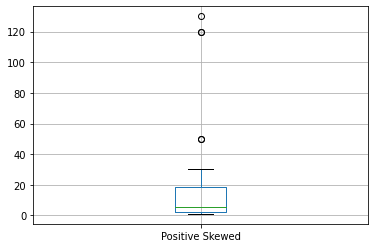

In [46]:
#Boxplot showing three outliers
df.boxplot(column='Positive Skewed')
plt.show()

C:\Users\Andrew\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

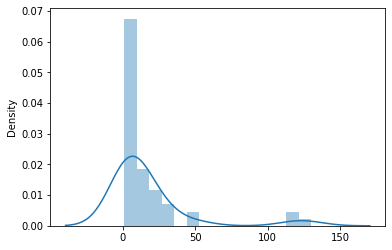

In [47]:

#Right Skewed data
sns.distplot(df)

In [48]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
df

,Positive Skewed
0,1
1,1
2,10
3,10
4,15
5,15
6,20
7,20
8,30
9,50


In [49]:

#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(df) 
out_array

,Positive Skewed
0,0.000000
1,0.000000
2,1.000000
3,1.000000
4,1.176091
5,1.176091
6,1.301030
7,1.301030
8,1.477121
9,1.698970


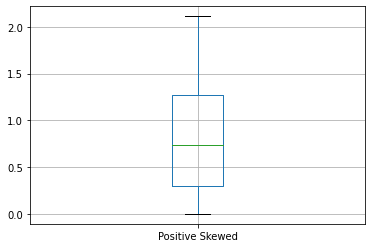

In [50]:
#Boxplot showing No outliers with all of them treated by doing log10 transformation.
out_array.boxplot(column='Positive Skewed')
plt.show()

C:\Users\Andrew\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

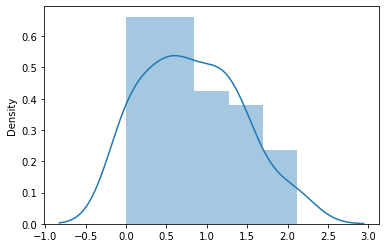

In [51]:
#Right Skewed data transformed to Fairly or close to Normal Distribution using Log10 transformations
sns.distplot(out_array)

# Z-Test

In [52]:
import pandas as pd
import numpy as np

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [54]:
type(boston)

sklearn.utils.Bunch

In [55]:
boston = pd.DataFrame(boston.data, columns = boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
#unvariate outlier 
#multivariate outliers

using box plot

<AxesSubplot:xlabel='DIS'>

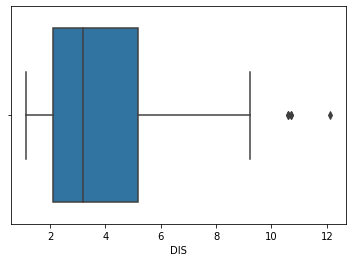

In [57]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=boston['DIS'])


In [58]:
# Outlier Detection Part 2
boston_c = boston

Outlier Detection through Mathematical Method (Z-Score

In [59]:
from scipy import stats

#scipy > numpy > pandas/Sklearn
zscore = np.abs(stats.zscore(boston_c))
zscore

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [60]:
threshold = 3
np.where(zscore > 3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1


Outlier Detection through Mathematical Method (Inter Quartile Range)

In [61]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
boston_iqr = boston
Q1 = boston_iqr.quantile(0.25)
Q3 = boston_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [63]:
(boston_iqr < (Q1 - threshold * IQR)) | (boston_iqr > (Q3 + threshold * IQR))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
threshold = 3
boston_clean = boston
boston_clean = boston_clean[(zscore < threshold).all(axis=1)]

boston.shape

(506, 13)

In [65]:
boston_clean.shape

(415, 13)

In [66]:
#Remove Outliers using IQR
zscore = 3
boston_iqr_clean = boston_iqr[~((boston_iqr < (Q1 - zscore * IQR)) | (boston_iqr > (Q3 + zscore * IQR))).any(axis=1)]

In [67]:
boston_iqr_clean.shape

(350, 13)

# Operations


In [68]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
capital=lambda x:x.upper()

df['Species'].apply(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [70]:
#map  function 
df['Species'].map(capital)

0         IRIS-SETOSA
1         IRIS-SETOSA
2         IRIS-SETOSA
3         IRIS-SETOSA
4         IRIS-SETOSA
            ...      
145    IRIS-VIRGINICA
146    IRIS-VIRGINICA
147    IRIS-VIRGINICA
148    IRIS-VIRGINICA
149    IRIS-VIRGINICA
Name: Species, Length: 150, dtype: object

In [71]:
#Dropping unwanted columns

#axis 1 - columns
#axis 0 - rows

df = df.drop(['Id','Species'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
#ApplyMap function usage on Built-In function (sqrt, square)
df.applymap(np.sqrt)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,2.258318,1.870829,1.183216,0.447214
1,2.213594,1.732051,1.183216,0.447214
2,2.167948,1.788854,1.140175,0.447214
3,2.144761,1.760682,1.224745,0.447214
4,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575
146,2.509980,1.581139,2.236068,1.378405
147,2.549510,1.732051,2.280351,1.414214
148,2.489980,1.843909,2.323790,1.516575


In [73]:
df.applymap(np.square)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [74]:
def multiply50(x):
    if type(x) is str:
        return x
    else:
        return 50*x

In [75]:
df.applymap(multiply50)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,255.0,175.0,70.0,10.0
1,245.0,150.0,70.0,10.0
2,235.0,160.0,65.0,10.0
3,230.0,155.0,75.0,10.0
4,250.0,180.0,70.0,10.0
...,...,...,...,...
145,335.0,150.0,260.0,115.0
146,315.0,125.0,250.0,95.0
147,325.0,150.0,260.0,100.0
148,310.0,170.0,270.0,115.0
